## Import libs, set paths and load params

In [1]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")
networks = ['randg', 'gnw','networkx','fflatt', 'dag']
organisms = ['ecoli']

sizes = ['500', '750', '1000', '1500']
n_trials = 10

os.chdir('../networks/')
gnwdir = '/home/erikz/sonnhammer/gnw'
fflattdir = '../snippets/'

In [2]:
print(os.getcwd())
topology_dir = os.path.join(os.getcwd(), 'topology')

/home/erikz/sonnhammer/network_generation_algo/networks


In [3]:
#collect data
connectivity_lst = []
for network in networks:
    for number, organism in enumerate(organisms):
        for size in sizes:
            current_dir = os.path.join(topology_dir, network, organism, size)
            for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*sv'))):
                connectivity_lst.append(f.analyze_connectivity(file, network, rep, size))

In [4]:
connectivity_df = pd.concat(connectivity_lst)

In [6]:
os.chdir('../results/tables/')
connectivity_df.to_csv('connectivity_stats.tsv')

In [8]:
connectivity_df = pd.read_csv('connectivity_stats.tsv',sep=",")

In [9]:
connectivity_df["size"] = pd.to_numeric(connectivity_df["size"])
connectivity_df["average degree"] = np.log2(connectivity_df["average degree"])
connectivity_df["frequency"] = np.log2(connectivity_df["frequency"])

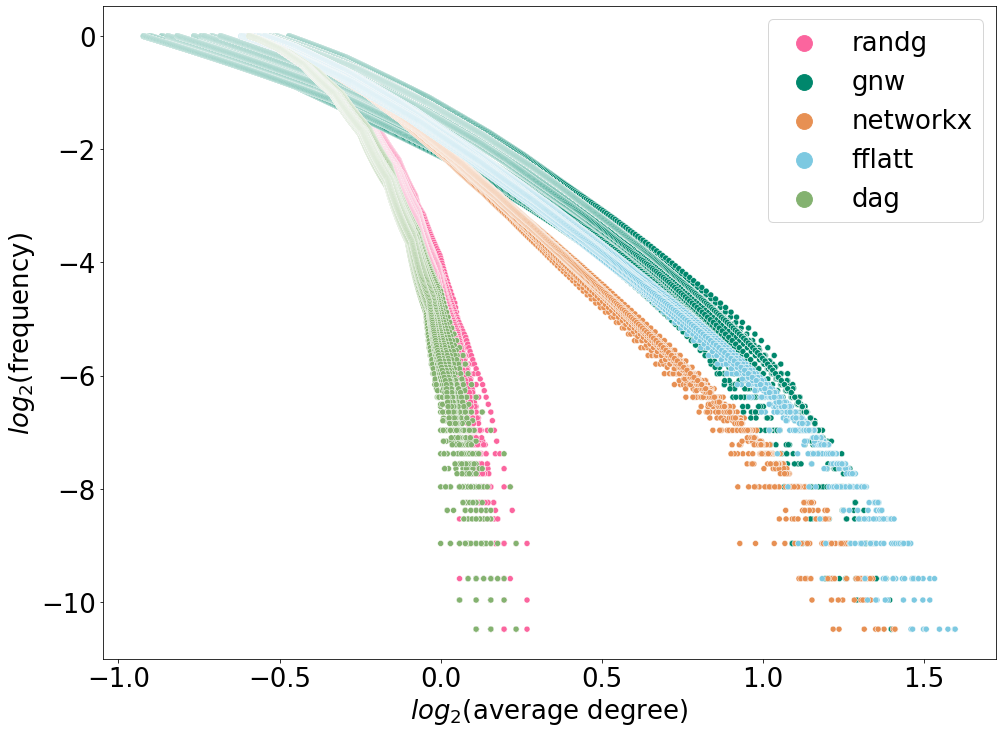

In [11]:
plt.rcParams.update({'font.size': 26})
import seaborn as sns

#connectivity_df = connectivity_df[['frequency','average degree', 'network', 'network', 'size', 'rep']]
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(x='average degree', y='frequency', hue='network', data=connectivity_df, palette = ['#fb659e','#00876c', '#e79053','#7dc9e1','#84b270'])
plt.xlabel('$log_{2}$(average degree)')
plt.ylabel('$log_{2}$(frequency)')
handles, labels = ax.get_legend_handles_labels()
for lh in ax.get_legend_handles_labels()[0]: 
    lh.set_alpha(1)
    lh.set_sizes([250])
ax.legend(handles=handles, labels=labels)
os.chdir('../figures')
plt.savefig("figure8.svg")
plt.savefig("figure8.png")
plt.show()